In [1]:
from SnowflakeManager import SnowflakeManager
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
manager = SnowflakeManager()
manager.connect()

# Análise Tabela PUC_VENDAS

## Explicação da Tabela PUC_VENDAS

A tabela `PUC_VENDAS` é uma tabela dinâmica que contém informações detalhadas sobre transações de vendas (cupons) da cidade de Porto Alegre, no período de janeiro de 2024 a junho de 2024. Esta tabela serve como um dataset para um desafio apresentado aos alunos do curso de Data Science da PUC.

### Colunas da Tabela

- **COD_CUPOM**: Esta coluna armazena o código do cupom de venda. Ele identifica de forma única cada transação de venda.

- **COD_CLIENTE**: O identificador do cliente. Cada cliente possui um código único no sistema, permitindo o rastreamento das compras feitas por cada um.

- **CLIENTE_FISICO_JURIDICO**: Esta coluna indica se o cliente é uma pessoa física ou uma pessoa jurídica.

- **SEXO_CLIENTE**: O sexo do cliente é armazenado aqui. Os valores possíveis são 'M' para Masculino, 'F' para Feminino, e `null` para pessoas jurídicas ou quando a informação não foi fornecida.

- **DTNASCIMENTO_CLIENTE**: A data de nascimento do cliente.

- **COD_SKU**: Um código interno do produto usado pela São João para identificar o produto vendido na transação.

- **SKU**: A descrição do produto.

- **CATEGORIA_SKU**: A categoria do produto, conhecida internamente como grupo de produto.

- **SUBCATEGORIA_SKU**: A subcategoria do produto, conhecida internamente como subgrupo de produto.

- **COD_LOJA**: O identificador da loja onde a venda ocorreu.

- **UF_CIDADE**: O estado (UF) onde a venda ocorreu.

- **COD_CIDADE**: Um código interno usado pela São João para identificar a cidade onde a venda ocorreu.

- **NOME_CIDADE**: O nome da cidade onde a venda ocorreu.

- **DATA_CUPOM**: A data e hora em que a venda foi realizada.

- **UNIDADES**: A quantidade de unidades do produto entregues ao cliente.

- **IDENTIFICADOR_PROMOCIONAL**: Um código interno usado pela São João para identificar se o item foi vendido como parte de uma promoção.

- **PRECO_REGULAR**: O preço regular do produto.

- **TOTAL_DESCONTO**: O valor total dos descontos aplicados ao produto.

- **TOTAL_BRUTO**: O valor total bruto do item (antes dos descontos).

- **TOTAL_LIQUIDO**: O valor total líquido do item (após os descontos).

### Informações Adicionais

A tabela está configurada para atualizar automaticamente a cada 12 horas e foi inicializada no momento da criação. Ela utiliza o warehouse `PUC_WH` para o processamento. O objetivo desta tabela é fornecer dados de vendas abrangentes que podem ser utilizados para análise e pesquisa, especialmente para desafios acadêmicos relacionados à ciência de dados.


In [4]:
puc_vendas = manager.fetch_selling_data(sample=200000)
print(f"Shape: {puc_vendas.shape}")
puc_vendas.head()

Shape: (200000, 20)


,COD_CUPOM,COD_CLIENTE,CLIENTE_FISICO_JURIDICO,SEXO_CLIENTE,DTNASCIMENTO_CLIENTE,COD_SKU,SKU,CATEGORIA_SKU,SUBCATEGORIA_SKU,COD_LOJA,UF_CIDADE,COD_CIDADE,NOME_CIDADE,DATA_CUPOM,UNIDADES,IDENTIFICADOR_PROMOCIONAL,PRECO_REGULAR,TOTAL_DESCONTO,TOTAL_BRUTO,TOTAL_LIQUIDO
0,827981,250,Pessoa Física,F,1974-03-29,10094645,PARACETAMOL+PSEUDO 2,MEDICAMENTOS,GENERICO SUPER ONEROSO,77,RS,80400,PORTO ALEGRE,2024-05-09 14:34:04.875,2.0,NaN,15.21,0.00,30.42,30.42
1,827981,250,Pessoa Física,F,1974-03-29,13427,CIFLOGEX 12PAST LARANJA CIMED,MEDICAMENTOS,SIMILAR,77,RS,80400,PORTO ALEGRE,2024-05-09 14:34:04.875,1.0,100327142.0,19.90,5.00,19.90,14.90
2,827981,250,Pessoa Física,F,1974-03-29,13428,CIFLOGEX 12PAST MEL/LIMAO CIMED,MEDICAMENTOS,SIMILAR,77,RS,80400,PORTO ALEGRE,2024-05-09 14:34:04.875,1.0,100327143.0,19.90,5.00,19.90,14.90
3,827981,250,Pessoa Física,F,1974-03-29,10039151,COND ELSEVE 400ML GLYCOLIC GLOSS,PERFUMARIA,PERFUMARIA,77,RS,80400,PORTO ALEGRE,2024-05-09 14:34:04.875,1.0,100324886.0,36.99,5.09,36.99,31.90
4,827981,250,Pessoa Física,F,1974-03-29,10039158,SERUM ELSEVE 100ML GLYCOLIC GLOSS,PERFUMARIA,PERFUMARIA,77,RS,80400,PORTO ALEGRE,2024-05-09 14:34:04.875,1.0,100324884.0,49.99,0.09,49.99,49.90


In [5]:
puc_vendas.isnull().sum()

COD_CUPOM                         0
COD_CLIENTE                       0
CLIENTE_FISICO_JURIDICO           0
SEXO_CLIENTE                      0
DTNASCIMENTO_CLIENTE         199971
COD_SKU                           0
SKU                               0
CATEGORIA_SKU                     0
SUBCATEGORIA_SKU                  0
COD_LOJA                          0
UF_CIDADE                         0
COD_CIDADE                        0
NOME_CIDADE                       0
DATA_CUPOM                        0
UNIDADES                          0
IDENTIFICADOR_PROMOCIONAL    185513
PRECO_REGULAR                     0
TOTAL_DESCONTO                    0
TOTAL_BRUTO                       0
TOTAL_LIQUIDO                     0
dtype: int64

In [6]:
puc_vendas.nunique()

COD_CUPOM                    149123
COD_CLIENTE                       4
CLIENTE_FISICO_JURIDICO           1
SEXO_CLIENTE                      2
DTNASCIMENTO_CLIENTE              3
COD_SKU                       10831
SKU                            9564
CATEGORIA_SKU                     8
SUBCATEGORIA_SKU                 68
COD_LOJA                         94
UF_CIDADE                         1
COD_CIDADE                        1
NOME_CIDADE                       1
DATA_CUPOM                   161753
UNIDADES                         27
IDENTIFICADOR_PROMOCIONAL      1793
PRECO_REGULAR                  3618
TOTAL_DESCONTO                 2925
TOTAL_BRUTO                    4848
TOTAL_LIQUIDO                  5735
dtype: int64

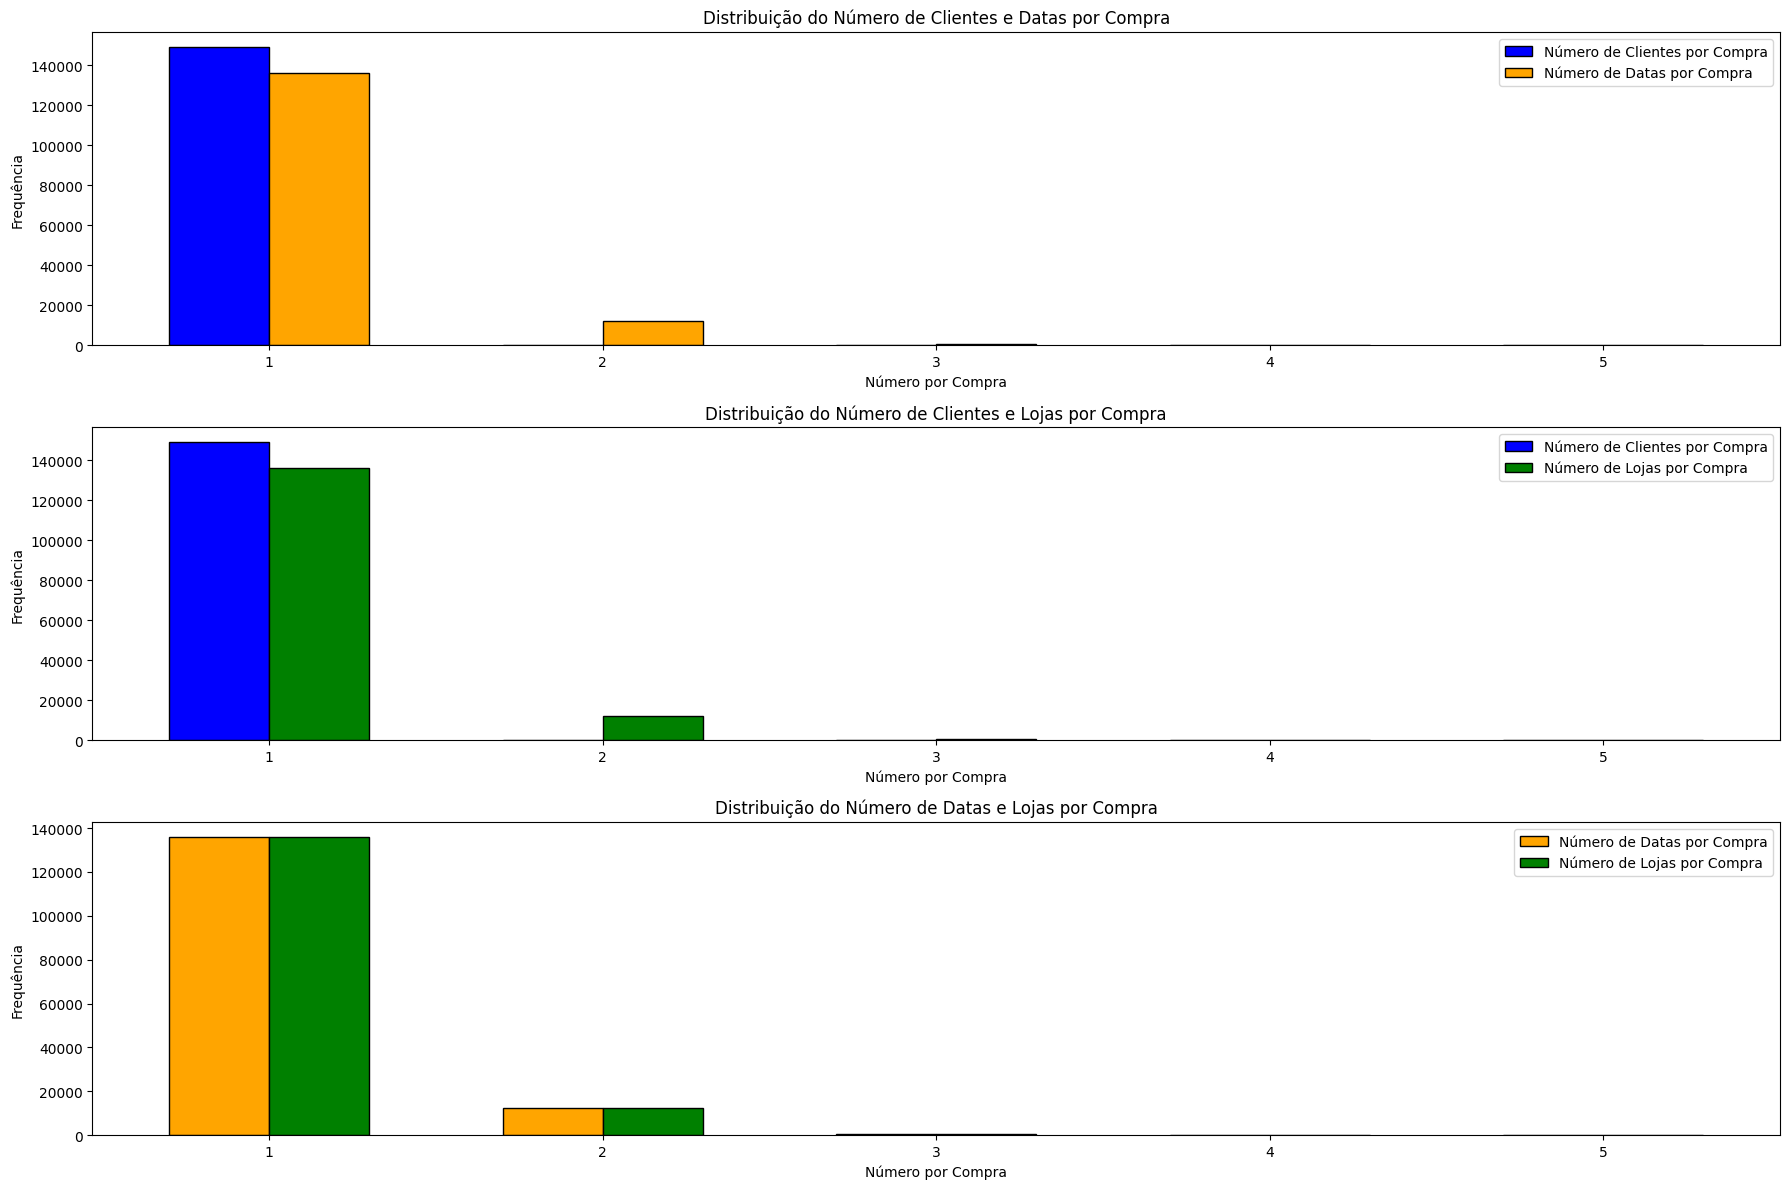

In [7]:
clientes_por_compra = puc_vendas.groupby('COD_CUPOM')['COD_CLIENTE'].nunique()
datas_por_compra = puc_vendas.groupby('COD_CUPOM')['DATA_CUPOM'].nunique()
lojas_por_compra = puc_vendas.groupby('COD_CUPOM')['COD_LOJA'].nunique()

bins = np.arange(1, max(clientes_por_compra.max(), datas_por_compra.max(), lojas_por_compra.max()) + 2)

freq_clientes, _ = np.histogram(clientes_por_compra, bins=bins)
freq_datas, _ = np.histogram(datas_por_compra, bins=bins)
freq_lojas, _ = np.histogram(lojas_por_compra, bins=bins)

plt.figure(figsize=(18, 12))

plt.subplot(3, 1, 1)
width = 0.3
plt.bar(bins[:-1] - width/2, freq_clientes, width=width, label='Número de Clientes por Compra', color='blue', edgecolor='black')
plt.bar(bins[:-1] + width/2, freq_datas, width=width, label='Número de Datas por Compra', color='orange', edgecolor='black')
plt.title('Distribuição do Número de Clientes e Datas por Compra')
plt.xlabel('Número por Compra')
plt.ylabel('Frequência')
plt.legend()

plt.subplot(3, 1, 2)
plt.bar(bins[:-1] - width/2, freq_clientes, width=width, label='Número de Clientes por Compra', color='blue', edgecolor='black')
plt.bar(bins[:-1] + width/2, freq_lojas, width=width, label='Número de Lojas por Compra', color='green', edgecolor='black')
plt.title('Distribuição do Número de Clientes e Lojas por Compra')
plt.xlabel('Número por Compra')
plt.ylabel('Frequência')
plt.legend()

plt.subplot(3, 1, 3)
plt.bar(bins[:-1] - width/2, freq_datas, width=width, label='Número de Datas por Compra', color='orange', edgecolor='black')
plt.bar(bins[:-1] + width/2, freq_lojas, width=width, label='Número de Lojas por Compra', color='green', edgecolor='black')
plt.title('Distribuição do Número de Datas e Lojas por Compra')
plt.xlabel('Número por Compra')
plt.ylabel('Frequência')
plt.legend()

plt.tight_layout()
plt.show()

Os gráficos apresentados revelam que há compras onde o número de clientes, datas e lojas associadas não são consistentes entre si. Por exemplo, algumas compras possuem mais de um cliente, mas o número de clientes não corresponde ao número de datas ou ao número de lojas. Isso sugere que múltiplas transações ou registros estão sendo agregados sob o mesmo código de compra (COD_CUPOM), mas com variações significativas nos atributos associados (clientes, datas e lojas). Esse desalinhamento pode indicar problemas de integridade dos dados, como erros na forma de registro das transações ou inconsistências na maneira como os dados foram agregados. Se esses dados forem utilizados para análises, como avaliar o comportamento do consumidor ou a eficiência de vendas em diferentes lojas, essas inconsistências podem levar a conclusões imprecisas ou enganosas, comprometendo a qualidade das decisões baseadas nesses dados. Portanto, é essencial investigar e corrigir essas discrepâncias para garantir a precisão e a confiabilidade das análises subsequentes.

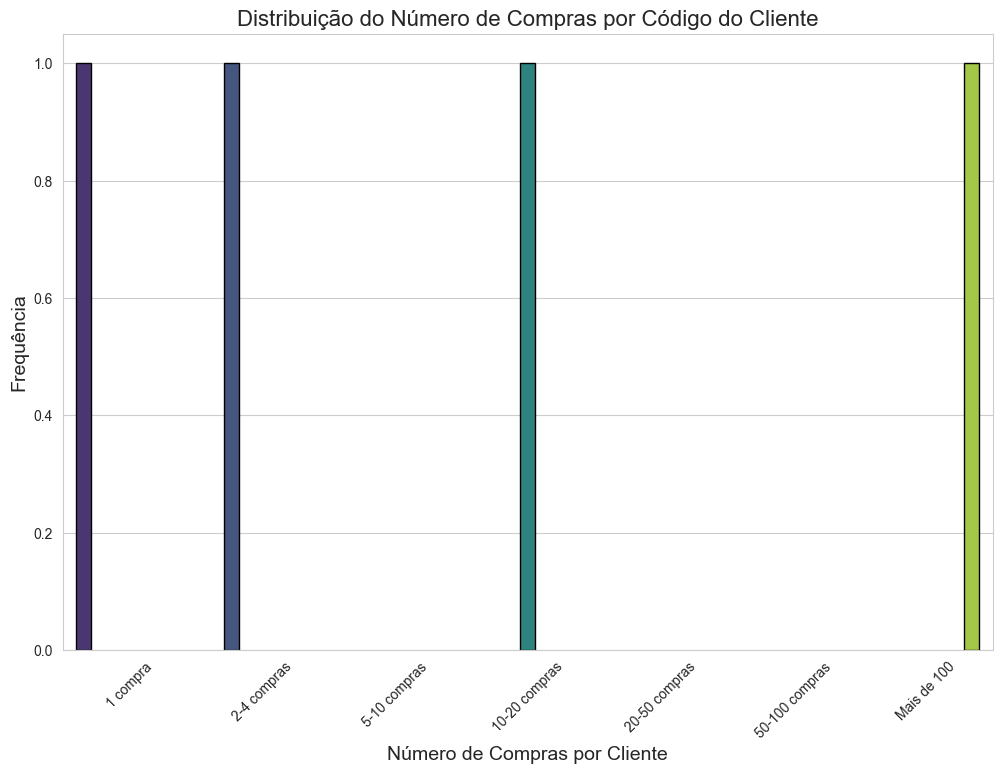

In [8]:
compras_por_cliente = puc_vendas.groupby('COD_CLIENTE')['COD_CUPOM'].nunique()

bins = [1, 2, 5, 10, 20, 50, 100, compras_por_cliente.max() + 1]
labels = ['1 compra', '2-4 compras', '5-10 compras', '10-20 compras', '20-50 compras', '50-100 compras', 'Mais de 100']

compras_por_cliente_binned = pd.cut(compras_por_cliente, bins=bins, labels=labels, right=False)

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

sns.countplot(x=compras_por_cliente_binned, hue=compras_por_cliente_binned, palette="viridis", edgecolor='black', legend=False)

plt.title('Distribuição do Número de Compras por Código do Cliente', fontsize=16)
plt.xlabel('Número de Compras por Cliente', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.xticks(rotation=45)

plt.show()

In [9]:
puc_vendas.groupby('COD_CLIENTE')['COD_CUPOM'].nunique().agg(['min', 'mean', 'median', 'max'])

min            1.00
mean       37280.75
median         6.00
max       149110.00
Name: COD_CUPOM, dtype: float64

In [10]:
puc_vendas[["COD_CLIENTE", "CLIENTE_FISICO_JURIDICO"]].drop_duplicates()

,COD_CLIENTE,CLIENTE_FISICO_JURIDICO
0,250,Pessoa Física
22,253,Pessoa Física
27,120,Pessoa Física
29,0,Pessoa Física


In [11]:
puc_vendas.SEXO_CLIENTE.value_counts()

SEXO_CLIENTE
M    199971
F        29
Name: count, dtype: int64

In [12]:
puc_vendas.head()

,COD_CUPOM,COD_CLIENTE,CLIENTE_FISICO_JURIDICO,SEXO_CLIENTE,DTNASCIMENTO_CLIENTE,COD_SKU,SKU,CATEGORIA_SKU,SUBCATEGORIA_SKU,COD_LOJA,UF_CIDADE,COD_CIDADE,NOME_CIDADE,DATA_CUPOM,UNIDADES,IDENTIFICADOR_PROMOCIONAL,PRECO_REGULAR,TOTAL_DESCONTO,TOTAL_BRUTO,TOTAL_LIQUIDO
0,827981,250,Pessoa Física,F,1974-03-29,10094645,PARACETAMOL+PSEUDO 2,MEDICAMENTOS,GENERICO SUPER ONEROSO,77,RS,80400,PORTO ALEGRE,2024-05-09 14:34:04.875,2.0,NaN,15.21,0.00,30.42,30.42
1,827981,250,Pessoa Física,F,1974-03-29,13427,CIFLOGEX 12PAST LARANJA CIMED,MEDICAMENTOS,SIMILAR,77,RS,80400,PORTO ALEGRE,2024-05-09 14:34:04.875,1.0,100327142.0,19.90,5.00,19.90,14.90
2,827981,250,Pessoa Física,F,1974-03-29,13428,CIFLOGEX 12PAST MEL/LIMAO CIMED,MEDICAMENTOS,SIMILAR,77,RS,80400,PORTO ALEGRE,2024-05-09 14:34:04.875,1.0,100327143.0,19.90,5.00,19.90,14.90
3,827981,250,Pessoa Física,F,1974-03-29,10039151,COND ELSEVE 400ML GLYCOLIC GLOSS,PERFUMARIA,PERFUMARIA,77,RS,80400,PORTO ALEGRE,2024-05-09 14:34:04.875,1.0,100324886.0,36.99,5.09,36.99,31.90
4,827981,250,Pessoa Física,F,1974-03-29,10039158,SERUM ELSEVE 100ML GLYCOLIC GLOSS,PERFUMARIA,PERFUMARIA,77,RS,80400,PORTO ALEGRE,2024-05-09 14:34:04.875,1.0,100324884.0,49.99,0.09,49.99,49.90


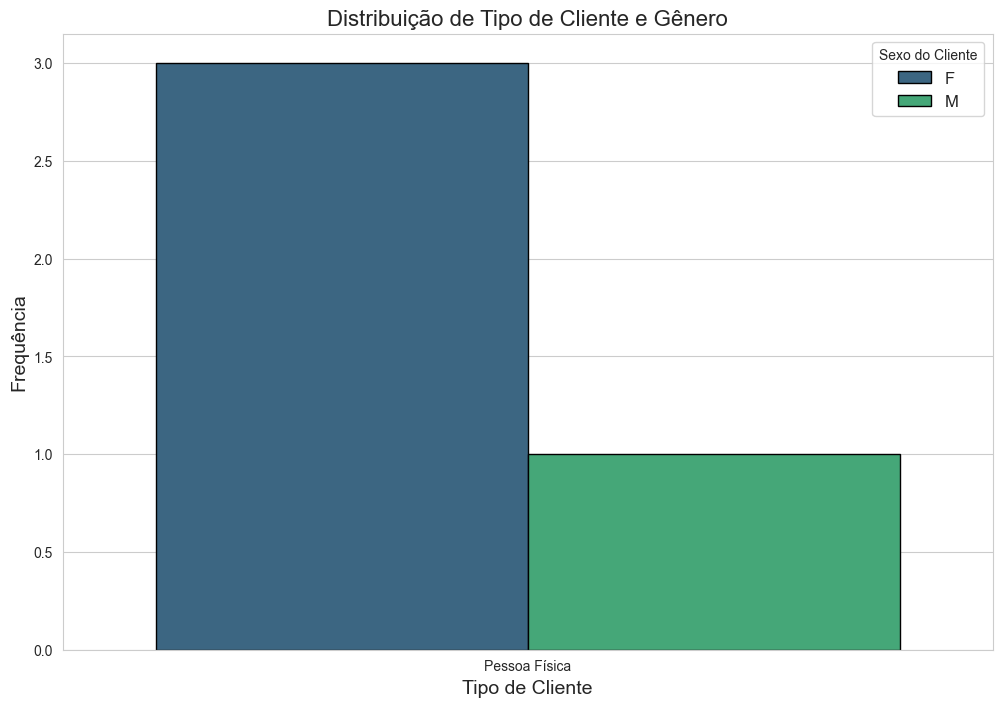

In [13]:
clientes_data = puc_vendas[["COD_CLIENTE", "CLIENTE_FISICO_JURIDICO", "SEXO_CLIENTE"]].drop_duplicates()
clientes_data.loc[clientes_data["CLIENTE_FISICO_JURIDICO"] == "Pessoa Jurídica", "SEXO_CLIENTE"] = "SS"

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

sns.countplot(x='CLIENTE_FISICO_JURIDICO', hue='SEXO_CLIENTE', data=clientes_data, palette='viridis', edgecolor='black')

plt.title('Distribuição de Tipo de Cliente e Gênero', fontsize=16)
plt.xlabel('Tipo de Cliente', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.legend(title='Sexo do Cliente', fontsize=12)

plt.show()

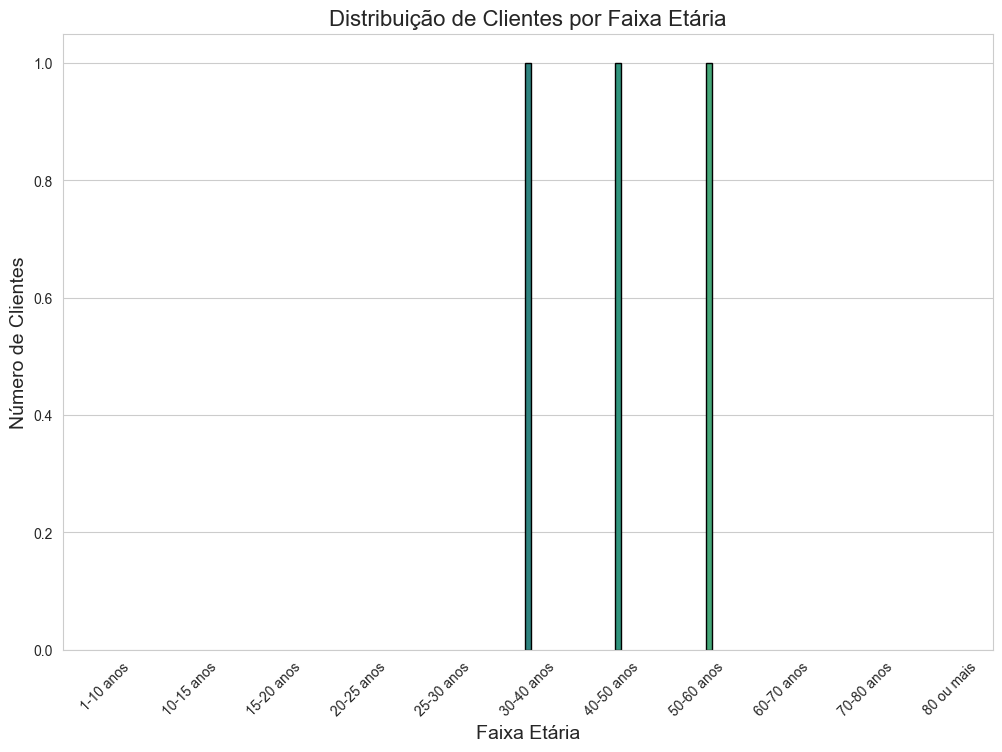

In [16]:
clientes_data = puc_vendas[['COD_CLIENTE', 'DTNASCIMENTO_CLIENTE']].drop_duplicates()

clientes_data['DTNASCIMENTO_CLIENTE'] = pd.to_datetime(clientes_data['DTNASCIMENTO_CLIENTE'], errors='coerce')

clientes_data['IDADE'] = (pd.to_datetime('today') - clientes_data['DTNASCIMENTO_CLIENTE']).dt.days // 365

bins = [1, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 100]
labels = ['1-10 anos', '10-15 anos', '15-20 anos', '20-25 anos', '25-30 anos', '30-40 anos', 
          '40-50 anos', '50-60 anos', '60-70 anos', '70-80 anos', '80 ou mais']

clientes_data['Faixa_Etaria'] = pd.cut(clientes_data['IDADE'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

sns.countplot(x='Faixa_Etaria', hue='Faixa_Etaria', data=clientes_data, palette='viridis', edgecolor='black', legend=False)

plt.title('Distribuição de Clientes por Faixa Etária', fontsize=16)
plt.xlabel('Faixa Etária', fontsize=14)
plt.ylabel('Número de Clientes', fontsize=14)
plt.xticks(rotation=45)

plt.show()

In [18]:
puc_vendas.COD_CLIENTE.value_counts()

COD_CLIENTE
0      199971
250        22
253         5
120         2
Name: count, dtype: int64